In [2]:
import pandas as pd
import numpy as np

Train = pd.read_csv('./SuperconductorTrain.csv', header = None,
                    index_col=False,low_memory=False)
print(Train)

                       0                 1                     2   \
0      number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass   
1                       4        88.9444675      57.8626922857143   
2                       5         92.729214      58.5184161428571   
3                       4        88.9444675      57.8852418571429   
4                       4        88.9444675      57.8739670714286   
...                   ...               ...                   ...   
21259                   4       106.9578775      53.0957693777778   
21260                   5          92.26674      49.0213666666667   
21261                   2          99.66319             95.609104   
21262                   2          99.66319            97.0956022   
21263                   3  87.4683333333333               86.8585   

                      3                      4                    5   \
0      gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass   
1       66.3615924315719   

In [3]:
Unique = pd.read_csv('./SuperconductorUnique.csv',header = None,
                   index_col=False,low_memory=False)
print(Unique)

      0   1   2   3  4  5  6   7  8   9   ...  78  79  80  81  82  83  84  85  \
0      H  He  Li  Be  B  C  N   O  F  Ne  ...  Au  Hg  Tl  Pb  Bi  Po  At  Rn   
1      0   0   0   0  0  0  0   4  0   0  ...   0   0   0   0   0   0   0   0   
2      0   0   0   0  0  0  0   4  0   0  ...   0   0   0   0   0   0   0   0   
3      0   0   0   0  0  0  0   4  0   0  ...   0   0   0   0   0   0   0   0   
4      0   0   0   0  0  0  0   4  0   0  ...   0   0   0   0   0   0   0   0   
...   ..  ..  ..  .. .. .. ..  .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..   
21259  0   0   0   0  0  0  0   0  0   0  ...   0   0   0   0   0   0   0   0   
21260  0   0   0   0  0  0  0  11  0   0  ...   0   0   1   0   0   0   0   0   
21261  0   0   0   0  0  0  0   0  0   0  ...   0   0   0   0   0   0   0   0   
21262  0   0   0   0  0  0  0   0  0   0  ...   0   0   0   0   0   0   0   0   
21263  0   0   0   0  0  0  0   0  0   0  ...   0   0   0   0   0   0   0   0   

                  86       

Text(0, 0.5, 'Number of Materials')

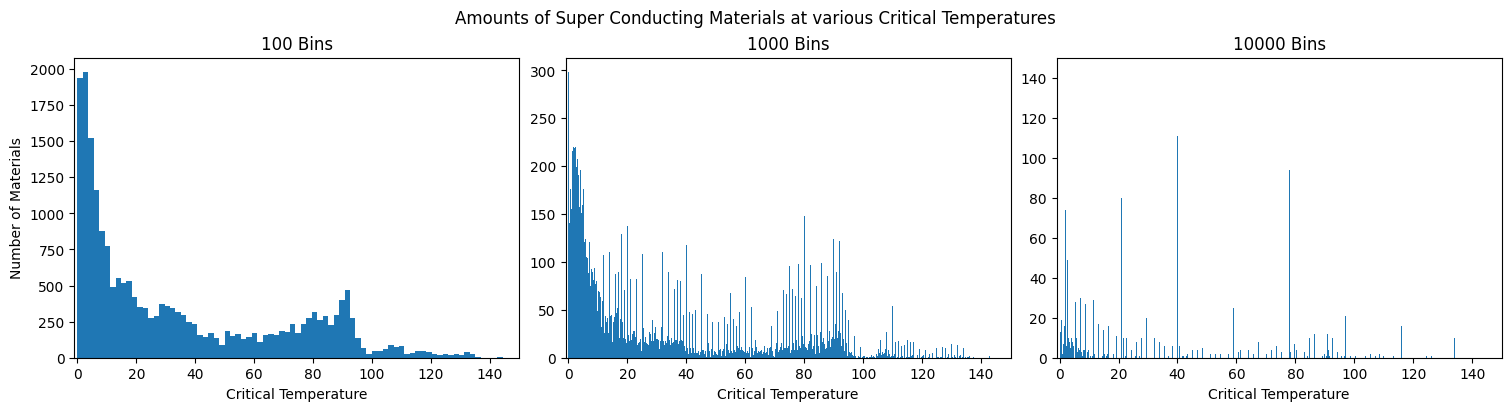

In [4]:
import matplotlib.pyplot as plt

Train = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                   usecols=[81])
Unique = np.loadtxt('./SuperconductorUnique.csv', skiprows = 2, delimiter = ",",
                    usecols=[86])

fig,(ax1,ax2,ax3) = plt.subplots(1,3,constrained_layout=True,figsize=(15,4))
ax1.hist(Train, bins=100)
ax1.set_title('100 Bins')
ax1.set_xlim(-1,150)
ax2.hist(Train, bins=1000)
ax2.set_title('1000 Bins')
ax2.set_xlim(-1,150)
ax3.hist(Train, bins=10000)
ax3.set_title('10000 Bins')
ax3.set_xlim(-1,150)
fig.suptitle(
    'Amounts of Super Conducting Materials at various Critical Temperatures')
ax1.set_xlabel('Critical Temperature')
ax2.set_xlabel('Critical Temperature')
ax3.set_xlabel('Critical Temperature')
ax1.set_ylabel('Number of Materials')

In [6]:
#Data
Trainset = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                      usecols = list(range(81)))
Target = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                    usecols = [81])

#Packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
import time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel

#Definitions and spliting data
param_grid = {
    'n_estimators' : [100,200,300,400],
   'max_depth' : [10,11,12,13,14,15,16,17,18,19,20]
}
grid_search = GridSearchCV(RFR(n_jobs = -7,random_state=0,max_features = 'log2'), param_grid, cv=10)

X_train, X_test, y_train, y_test = train_test_split(Trainset, Target, 
                                    random_state=1, test_size=0.15)

#Grid Search over the defined grid
t1 = time.time()
print("Test time start:{:.2f}".format(t1))
grid_search.fit(X_train,y_train)
t2 = time.time()
print("Total time of Test:{:.2f}".format((t2-t1)/60))
#Using the model with best results on the split test set.
RFR = RFR(max_depth = grid_search.best_index_, 
          n_estimators = grid_search.best_index_,
          n_jobs=-13,
          random_state=2,
          max_features = 'log2',
          oob_score = True
         )

RFR.fit(X_train,y_train)
final_score = RFR.score(X_test,y_test)

print('')
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
print("Train set score: {:.5f}".format(grid_search.score(X_test,y_test)))
print("Test final score: {:.5f}".format(final_score))
print("OOB Score: {:.2f}".format(RFR.oob_score_))

Test time start:1749926573.16
Total time of Test:11.58

Best Parameters: {'max_depth': 20, 'n_estimators': 400}
Best cross-validation score: 0.92635
Train set score: 0.92368
Test final score: 0.92168
OOB Score: 0.92


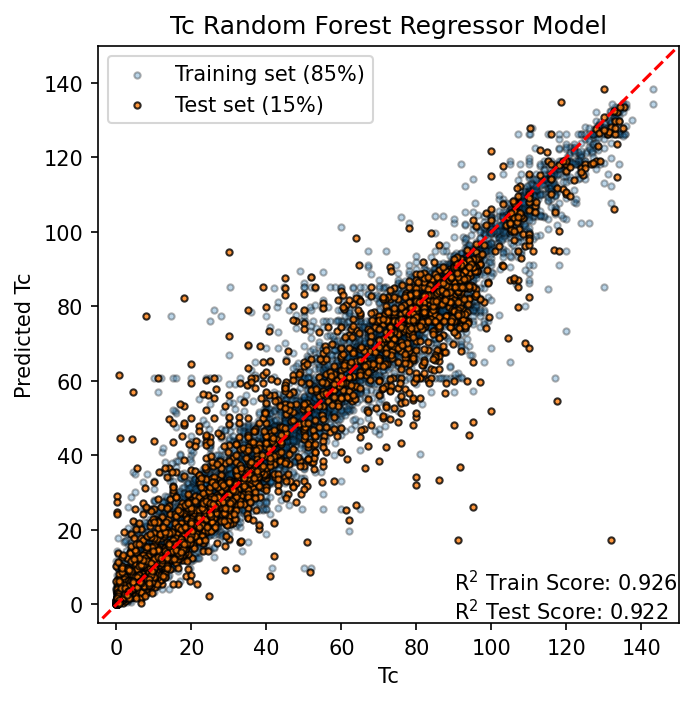

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
y_predict_test = RFR.predict(X_test)
y_predict_train = RFR.predict(X_train)

fig = plt.figure(figsize=[5,5], dpi=150)
plt.scatter(y_train,
            y_predict_train,
            edgecolors='black',
            marker='.',
            label='Training set (85%)',
            alpha=0.3)
plt.scatter(y_test,
            y_predict_test,
            edgecolors='black',
            marker='.',
            label='Test set (15%)',
            alpha=0.8)
plt.ylabel('Predicted Tc')
plt.xlabel('Tc')
plt.plot([-10,200],[-10,200],c='r',ls='--')
plt.xlim(-5,150)
plt.ylim(-5,150)
plt.text(90, -4, 'R$^2$ Train Score: {:.3f}\nR$^2$ Test Score: {:.3f}'.format(grid_search.best_score_, final_score))
plt.title('Tc Random Forest Regressor Model')
plt.legend(fontsize=10)

Features sorted by their score:
[(0.0643, ' std_ThermalConductivity '), (0.0604, ' range_ThermalConductivity '), (0.0507, ' wtd_mean_Valence ')]


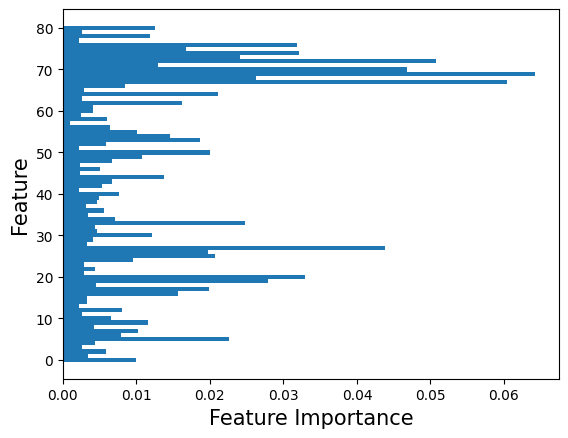

<Figure size 600x600 with 0 Axes>

In [11]:
#print("Feature importances:\n{}".format(RFR.feature_importances_))
import pandas as pd
import csv

Trainset = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                      usecols = list(range(81)))
Feature_List = pd.read_csv('./Feature List.txt',delimiter = ',')
Feature_List = pd.DataFrame(Feature_List)
Feature_List = Feature_List.columns.tolist()
np.reshape(Feature_List,(81,1))

importances = RFR.feature_importances_
importances = importances.sort()

print ("Features sorted by their score:")
Top_Feat = sorted(zip(map(lambda x: round(x, 4),
                     RFR.feature_importances_),
                     Feature_List), 
                     reverse=True)[:3]
print(Top_Feat)

def plot_feature_importances_sc(model):
    n_features = 81,
    plt.barh(range(81),
        model.feature_importances_,
        height = 1,
        align = 'center')
    plt.xlabel("Feature Importance",fontsize=15)
    plt.ylabel("Feature",fontsize=15)
    plt.figure(figsize=(2,2),dpi=300)
plot_feature_importances_sc(RFR)
plt.show()

In [14]:
from sklearn.metrics import max_error
max = max_error(y_test,
          y_predict_test
         )
print('Max Error:{:.3f}'.format(max))

Max Error:114.766


In [16]:
#Data, Trying larger grid searches
Trainset = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                      usecols = list(range(81)))
Target = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                    usecols = [81])

#Packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
import time
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel

#Definitions and spliting data
param_grid = {
    'n_estimators' : [100,200,500,750],
   'max_depth' : [10,11,12,13,14,15,16,17,18,19,20,30]
}
grid_search = GridSearchCV(RFR(n_jobs = -7,random_state=0,max_features = 'log2'), param_grid, cv=10)

X_train, X_test, y_train, y_test = train_test_split(Trainset, Target, 
                                    random_state=1, test_size=0.15)

#Grid Search over the defined grid
t1 = time.perf_counter()
print("Test started...")
grid_search.fit(X_train,y_train)
t2 = time.perf_counter()
elapsed = timedelta(seconds = t2 - t1)
print("Total elapsed time: {}".format(str(elapsed)))

#Using the model with best results on the split test set.
RFR = RFR(max_depth = grid_search.best_index_, 
          n_estimators = grid_search.best_index_,
          n_jobs=-13,
          random_state=2,
          max_features = 'log2',
          oob_score = True
         )

RFR.fit(X_train,y_train)
final_score = RFR.score(X_test,y_test)

print('')
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
print("Train set score: {:.5f}".format(grid_search.score(X_test,y_test)))
print("Test final score: {:.5f}".format(final_score))
print("OOB Score: {:.2f}".format(RFR.oob_score_))

Test started...
Total elapsed time: 0:19:30.684491

Best Parameters: {'max_depth': 30, 'n_estimators': 750}
Best cross-validation score: 0.92702
Train set score: 0.92391
Test final score: 0.92192
OOB Score: 0.92


Features sorted by their score:
[(0.0617, ' std_ThermalConductivity '), (0.0573, ' wtd_mean_Valence '), (0.0553, ' range_ThermalConductivity ')]


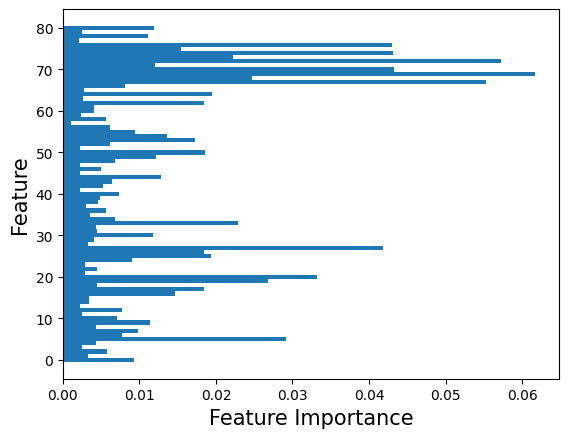

<Figure size 600x600 with 0 Axes>

In [17]:
#print("Feature importances:\n{}".format(RFR.feature_importances_))
import pandas as pd
import csv

Trainset = np.loadtxt('./SuperconductorTrain.csv', skiprows = 2, delimiter = ",",
                      usecols = list(range(81)))
Feature_List = pd.read_csv('./Feature List.txt',delimiter = ',')
Feature_List = pd.DataFrame(Feature_List)
Feature_List = Feature_List.columns.tolist()
np.reshape(Feature_List,(81,1))

importances = RFR.feature_importances_
importances = importances.sort()

print ("Features sorted by their score:")
Top_Feat_1 = sorted(zip(map(lambda x: round(x, 4),
                     RFR.feature_importances_),
                     Feature_List), 
                     reverse=True)[:3]
print(Top_Feat_1)

def plot_feature_importances_sc(model):
    n_features = 81,
    plt.barh(range(81),
        model.feature_importances_,
        height = 1,
        align = 'center')
    plt.xlabel("Feature Importance",fontsize=15)
    plt.ylabel("Feature",fontsize=15)
    plt.figure(figsize=(2,2),dpi=300)
plot_feature_importances_sc(RFR)
plt.show()

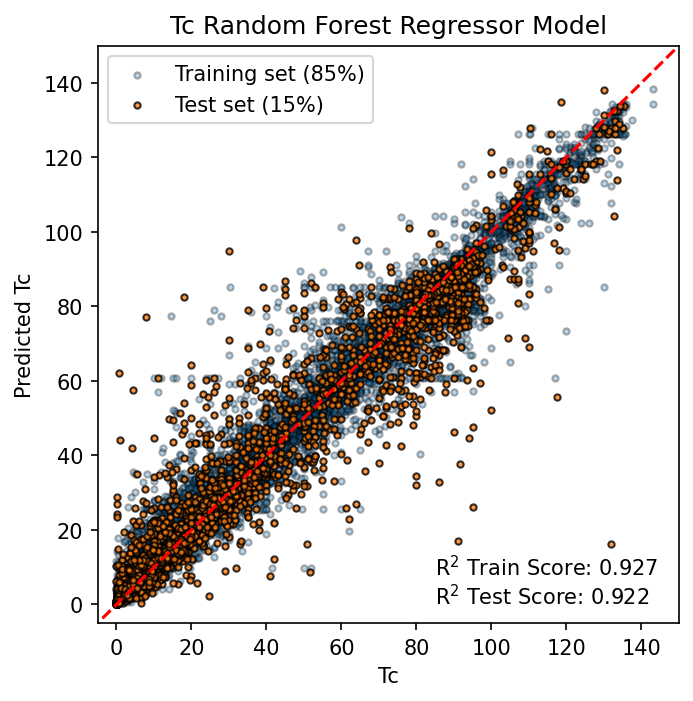

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
y_predict_test = RFR.predict(X_test)


fig = plt.figure(figsize=[5,5], dpi=150)
plt.scatter(y_train,
            y_predict_train,
            edgecolors='black',
            marker='.',
            label='Training set (85%)',
            alpha=0.3)
plt.scatter(y_test,
            y_predict_test,
            edgecolors='black',
            marker='.',
            label='Test set (15%)',
            alpha=0.8)
plt.ylabel('Predicted Tc')
plt.xlabel('Tc')
plt.plot([-10,200],[-10,200],c='r',ls='--')
plt.xlim(-5,150)
plt.ylim(-5,150)
plt.text(85, 0, 'R$^2$ Train Score: {:.3f}\nR$^2$ Test Score: {:.3f}'.format(grid_search.best_score_, final_score))
plt.title('Tc Random Forest Regressor Model')
plt.legend(fontsize=10)

In [19]:
from sklearn.metrics import max_error
max = max_error(y_test,
          y_predict_test
         )
print('Max Error:{:.3f}'.format(max))

Max Error:115.845
